In [1]:
import pandas as pd
from sklearn import metrics 

In [2]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
#Shape of dataframe

data.shape

(11054, 32)

In [7]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [9]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [11]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [13]:
#droping index column

data = data.drop(['Index'],axis = 1)
data = data.drop(['WebsiteTraffic'],axis = 1)
data = data.drop(['PageRank'],axis = 1)

In [15]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [23]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1).values
y = data["class"].values
print(X)

[[ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 [ 1  0  1 ...  1 -1  1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]]


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8843, 28) (8843,)
Testing set shape: (2211, 28) (2211,)


In [33]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
model_dt = DecisionTreeClassifier(max_depth=30)

# fit the model 
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_dt = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.96      0.96      0.96      2211

Confusion Matrix:
[[ 926   50]
 [  49 1186]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, random_state=42)

In [43]:

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print the confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.96
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Random Forest Confusion Matrix:
[[ 927   49]
 [  33 1202]]


In [11]:
# import joblib

# # Saving the model
# joblib.dump(model, 'model_Phishing28.pkl')


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
model_best = grid_search.best_estimator_


C:\Users\abinv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abinv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abinv\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\abinv\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abinv\anaconda3\Lib\site-packa

Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Random Forest model
model_rff = RandomForestClassifier(
    n_estimators=200,         # From grid search
    max_depth=20,             # From grid search
    min_samples_split=2,      # From grid search
    min_samples_leaf=1,       # From grid search
    max_features='log2',      # From grid search
    random_state=42
)
# Fit the model on the training data
model_rff.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=200,
                       random_state=42)

In [49]:
# Make predictions on the test set
y_pred_rff = model_rf.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_rff))
print("Classification Report:\n", classification_report(y_test, y_pred_rff))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rff))

Accuracy:  0.9629127091813658
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       976
           1       0.96      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Confusion Matrix:
 [[ 927   49]
 [  33 1202]]


In [71]:
importances = model_rff.feature_importances_
importances

array([0.01560245, 0.00980406, 0.00575656, 0.00643376, 0.00473753,
       0.0503422 , 0.0692779 , 0.33086201, 0.01723957, 0.00496238,
       0.00331526, 0.0067793 , 0.0256184 , 0.26978192, 0.04963374,
       0.02360141, 0.00619923, 0.00528664, 0.00679154, 0.00411165,
       0.00164554, 0.00613677, 0.00281393, 0.01614932, 0.01365053,
       0.01370594, 0.02311767, 0.00664275])

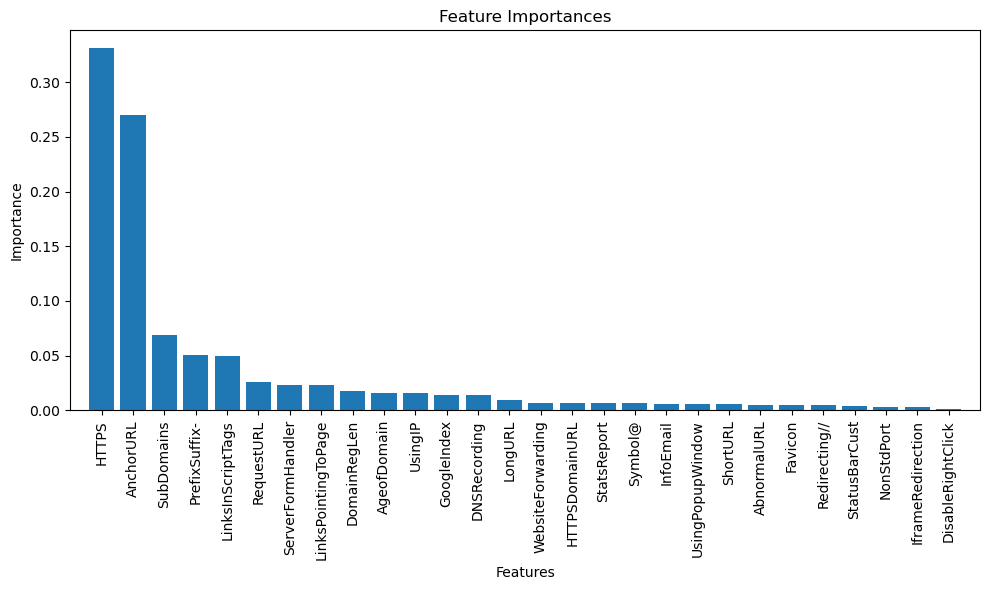

In [73]:
import numpy as np
import matplotlib.pyplot as plt


feature_names = data.drop("class", axis=1).columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [75]:
import joblib

# Saving the model
joblib.dump(model_rff, 'model_Phishing_1.pkl')

['model_Phishing_1.pkl']